In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

### Simulated Data

In [2]:
# create data
np.random.seed(42)
m = 50
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

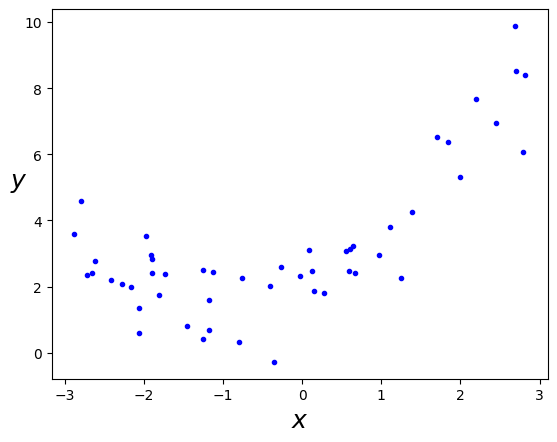

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.show()


In [4]:
X[0:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [7]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X_poly[0:5])

[[-0.75275929  0.56664654 -0.42654845  0.32108831]
 [ 2.70428584  7.3131619  19.77688015 53.48233692]
 [ 1.39196365  1.93756281  2.697017    3.75414962]
 [ 0.59195091  0.35040587  0.20742307  0.12278428]
 [-2.06388816  4.25963433 -8.79140884 18.14448459]]


In [5]:
y[0:5]

array([[2.26903057],
       [8.53223507],
       [4.24509677],
       [2.46605015],
       [0.58740702]])

In [18]:
def polynomial_fit(X,y, degree, X_test=None, y_test=None):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    # plot the data and the curve
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    if X_test is not None:
        plt.plot(X, y, "b.", label="Train Data")
        plt.plot(X_test, y_test, "g.", label="Test Data")
    else:
        plt.plot(X, y, "b.", label="Data")
    plt.plot(X_new, y_new, "r-", linewidth=2, label=f"Polynomial Degree {degree}")
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis([-3, 3, 0, 10])

    plt.show()

    y_pred = lin_reg.predict(X_poly)
    if X_test is not None:
        y_test_pred = lin_reg.predict(poly_features.transform(X_test))
        print('Train MAE:', round(mean_absolute_error(y, y_pred),2))
        print('Validation MAE:', round(mean_absolute_error(y_test, y_test_pred),2))
    else:
        print('MAE:', round(mean_absolute_error(y, y_pred),2))
    print('Intercept: {:.3f}'.format(float(lin_reg.intercept_[0])))
    print('Coefficients: {}'.format(', '.join(['{:.3f}'.format(float(coef)) for coef in np.nditer(lin_reg.coef_)]))) 
    return lin_reg


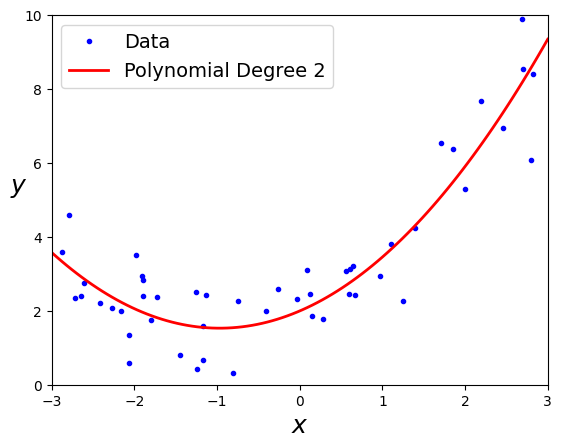

MAE: 0.73
Intercept: 1.996
Coefficients: 0.962, 0.496


In [9]:
X_poly = polynomial_fit(X=X, y=y, degree=2)

In [13]:
X[0:4]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091]])

In [12]:
X_poly[0:4]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587]])

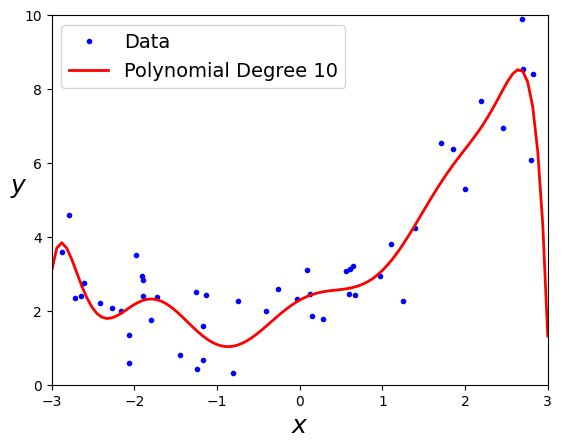

MAE: 0.68
Intercept: 2.291
Coefficients: 1.244, -1.669, -0.314, 2.054, 0.072, -0.672, 0.002, 0.091, -0.001, -0.004


In [43]:
x_ploy = polynomial_fit(X=X, y=y, degree=10)

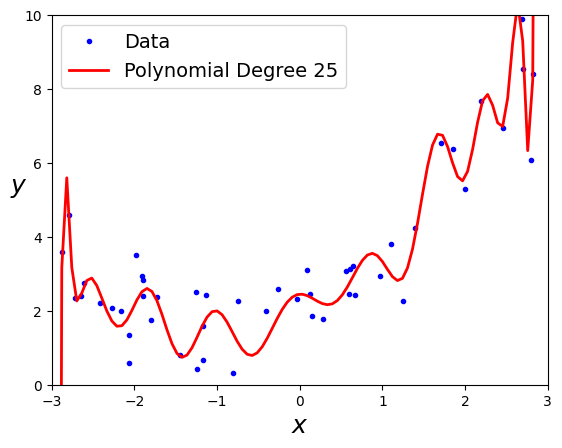

MAE: 0.47
Intercept: 2.451
Coefficients: 0.152, -7.594, 9.125, 20.215, -17.529, -6.584, 9.722, -25.975, 1.442, 35.560, -3.317, -21.492, 1.232, 7.521, -0.147, -1.647, -0.020, 0.229, 0.009, -0.020, -0.001, 0.001, 0.000, -0.000, -0.000


In [44]:
x_poly = polynomial_fit(X=X, y=y, degree=25)

[Taylor Theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem)

## Train-Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print('Number of training samples:', len(X_train))
print('Number of testing samples:', len(X_test))

Number of training samples: 40
Number of testing samples: 10


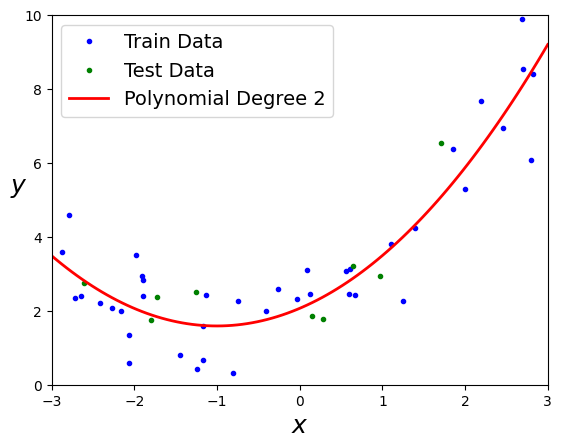

Train MAE: 0.73
Test MAE: 0.69
Intercept: 2.068
Coefficients: 0.953, 0.475


In [47]:
x_poly = polynomial_fit(X=X_train, y=y_train, degree=2, X_test=X_test, y_test=y_test)

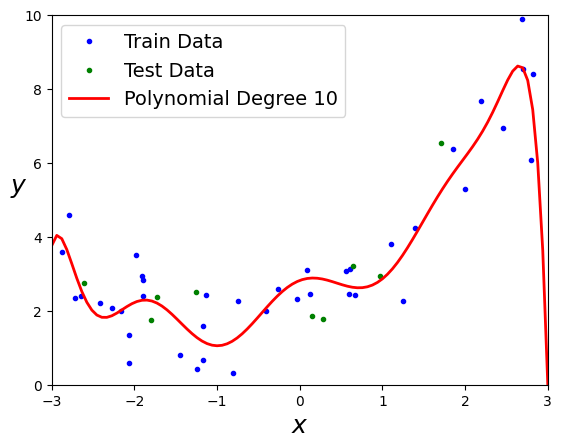

Train MAE: 0.65
Test MAE: 0.89
Intercept: 2.821
Coefficients: 0.843, -2.789, 0.160, 2.628, -0.131, -0.799, 0.037, 0.104, -0.003, -0.005


In [48]:
x_poly = polynomial_fit(X=X_train, y=y_train, degree=10, X_test=X_test, y_test=y_test)

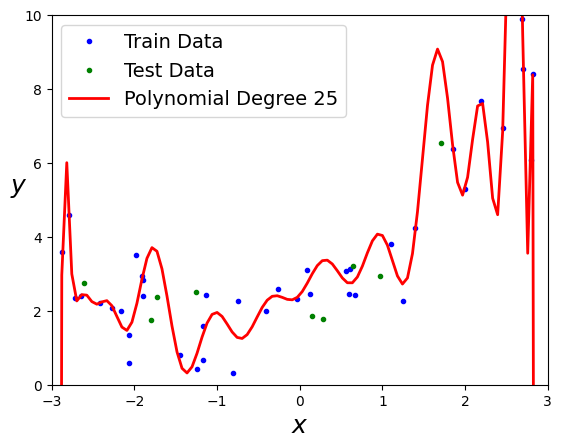

Train MAE: 0.31
Test MAE: 1.45
Intercept: 2.432
Coefficients: 2.606, 11.858, -15.009, -96.282, 50.474, 272.455, -74.791, -378.210, 54.028, 299.349, -17.766, -146.535, 0.147, 46.389, 1.965, -9.672, -0.735, 1.319, 0.136, -0.113, -0.014, 0.006, 0.001, -0.000, -0.000


In [49]:
x_poly = polynomial_fit(X=X_train, y=y_train, degree=25, X_test=X_test, y_test=y_test)

Degree 1


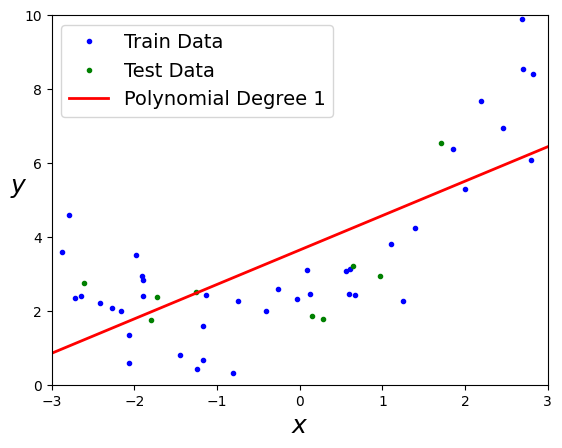

Train MAE: 1.34
Test MAE: 1.37
Intercept: 3.645
Coefficients: 0.931
Degree 2


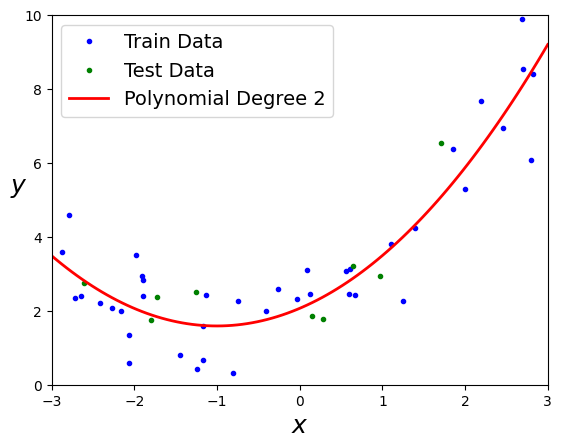

Train MAE: 0.73
Test MAE: 0.69
Intercept: 2.068
Coefficients: 0.953, 0.475
Degree 3


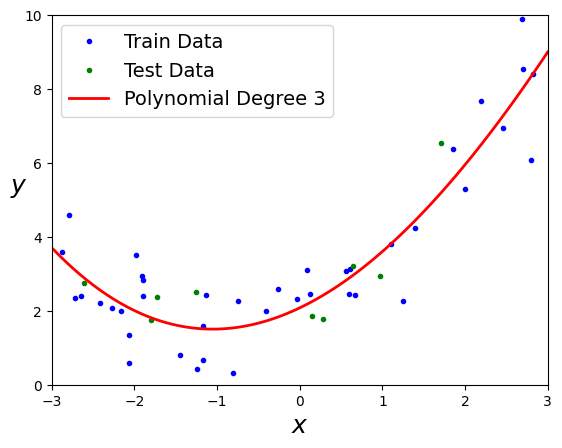

Train MAE: 0.73
Test MAE: 0.71
Intercept: 2.080
Coefficients: 1.070, 0.475, -0.021
Degree 4


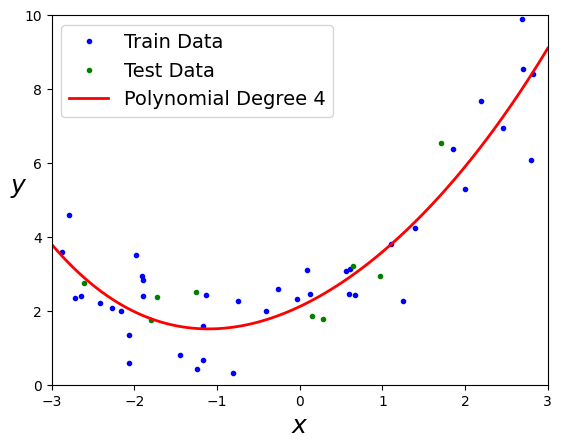

Train MAE: 0.72
Test MAE: 0.72
Intercept: 2.115
Coefficients: 1.059, 0.435, -0.019, 0.005
Degree 5


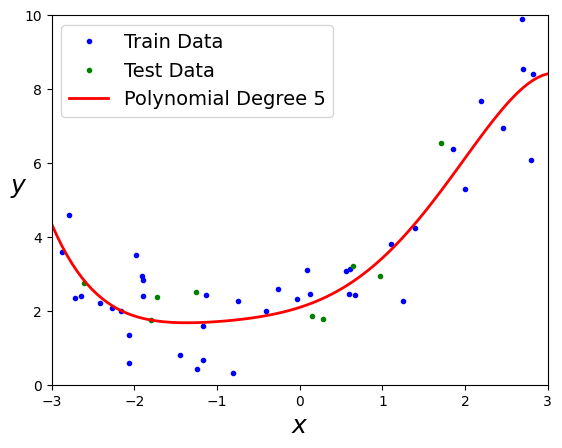

Train MAE: 0.71
Test MAE: 0.67
Intercept: 2.093
Coefficients: 0.718, 0.475, 0.161, 0.000, -0.018
Degree 6


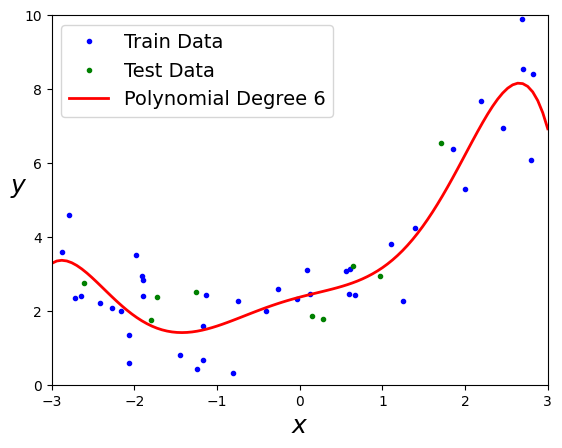

Train MAE: 0.72
Test MAE: 0.82
Intercept: 2.370
Coefficients: 0.591, -0.209, 0.223, 0.237, -0.025, -0.020
Degree 7


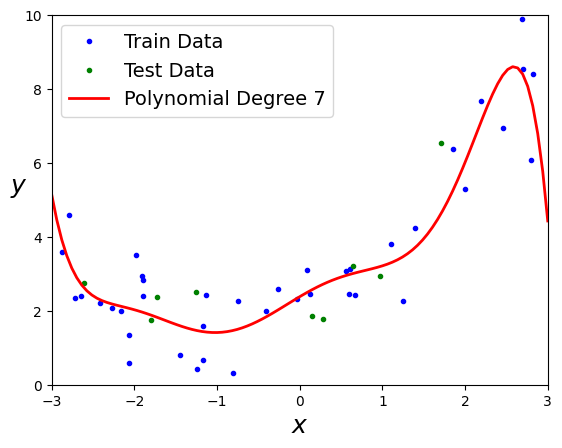

Train MAE: 0.69
Test MAE: 0.8
Intercept: 2.382
Coefficients: 1.326, -0.321, -0.603, 0.277, 0.195, -0.023, -0.016
Degree 8


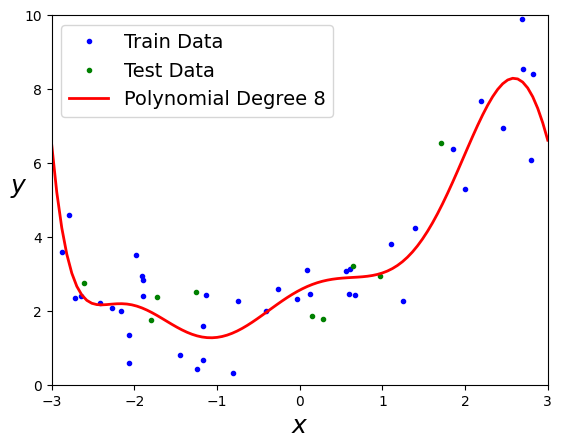

Train MAE: 0.68
Test MAE: 0.86
Intercept: 2.560
Coefficients: 1.178, -1.041, -0.450, 0.749, 0.157, -0.122, -0.013, 0.006
Degree 9


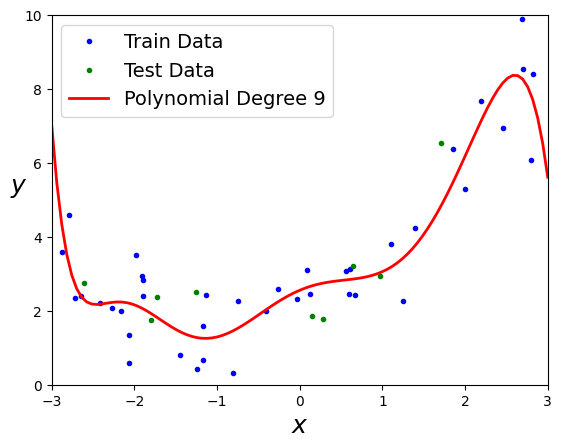

Train MAE: 0.67
Test MAE: 0.87
Intercept: 2.556
Coefficients: 0.951, -0.974, -0.066, 0.700, -0.015, -0.112, 0.015, 0.006, -0.002


In [51]:
for degree in range(1,10):
    print(f'Degree {degree}')
    polynomial_fit(X=X_train, y=y_train, degree=degree, X_test=X_test, y_test=y_test)

# Train-Validation-Test Split

In [12]:
# split data to train, validation and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
print(f'number of sample is X_train_val: {len(X_train_val)}')
print(f'number of sample is X_test: {len(X_test)}')

number of sample is X_train_val: 45
number of sample is X_test: 5


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [15]:
print(f'number of sample is X_train: {len(X_train)}')
print(f'number of sample is X_val: {len(X_val)}')

number of sample is X_train: 40
number of sample is X_val: 5


Degree 1


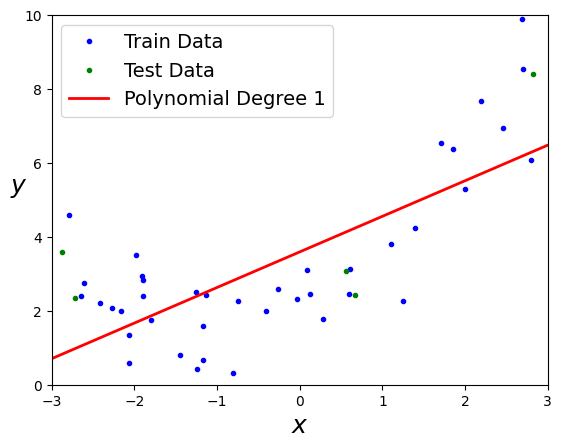

Train MAE: 1.25
Validation MAE: 1.82
Intercept: 3.594
Coefficients: 0.963
Degree 2


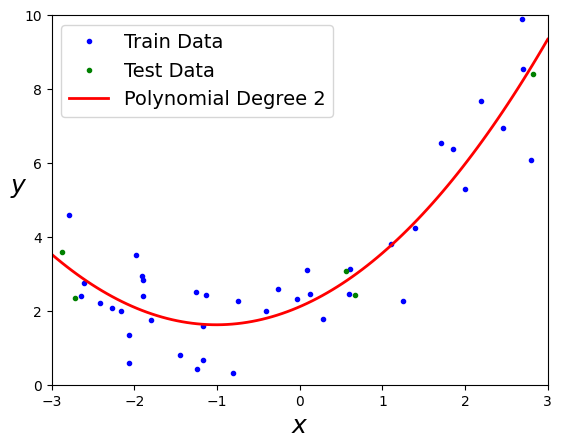

Train MAE: 0.76
Validation MAE: 0.41
Intercept: 2.112
Coefficients: 0.970, 0.481
Degree 3


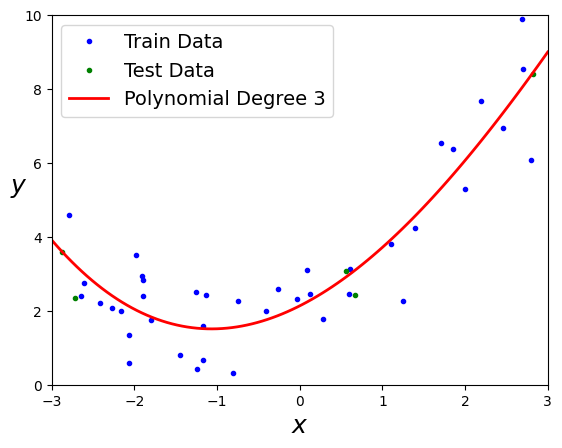

Train MAE: 0.77
Validation MAE: 0.36
Intercept: 2.135
Coefficients: 1.133, 0.480, -0.032
Degree 4


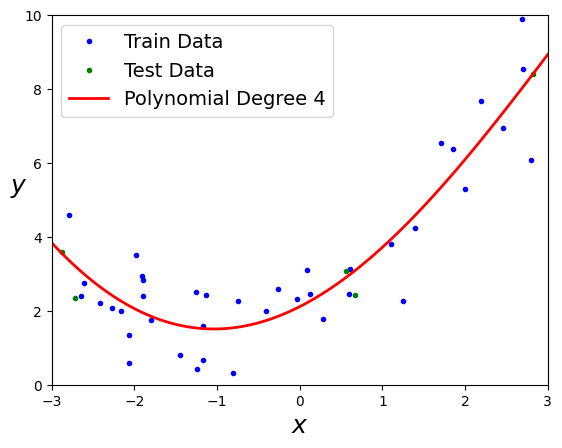

Train MAE: 0.77
Validation MAE: 0.35
Intercept: 2.114
Coefficients: 1.137, 0.504, -0.032, -0.003
Degree 5


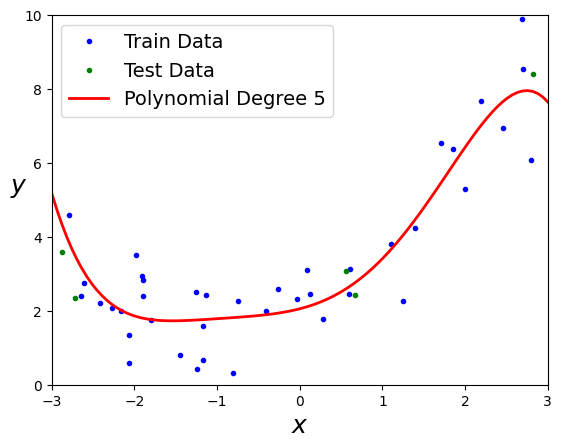

Train MAE: 0.73
Validation MAE: 0.65
Intercept: 2.055
Coefficients: 0.576, 0.552, 0.269, -0.007, -0.032
Degree 6


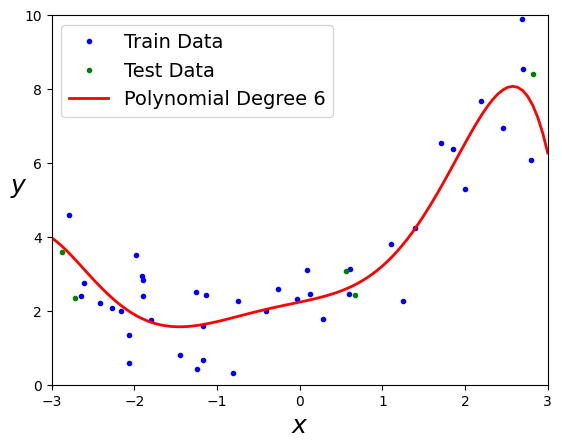

Train MAE: 0.73
Validation MAE: 0.57
Intercept: 2.236
Coefficients: 0.471, 0.071, 0.317, 0.169, -0.036, -0.016
Degree 7


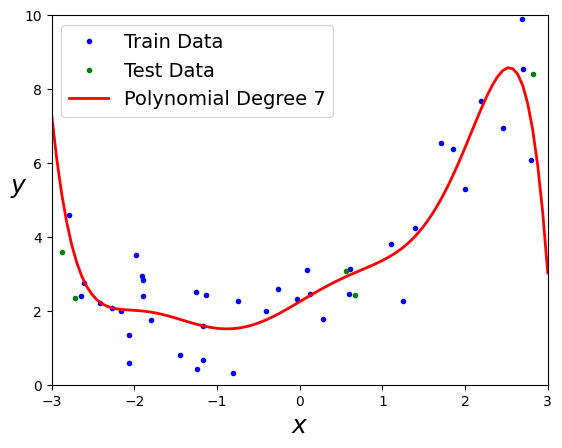

Train MAE: 0.69
Validation MAE: 0.99
Intercept: 2.247
Coefficients: 1.330, 0.031, -0.606, 0.181, 0.213, -0.017, -0.019
Degree 8


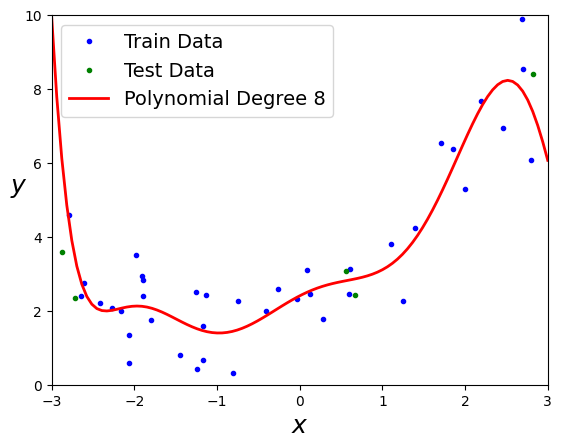

Train MAE: 0.68
Validation MAE: 1.07
Intercept: 2.406
Coefficients: 1.151, -0.737, -0.458, 0.710, 0.180, -0.132, -0.017, 0.008
Degree 9


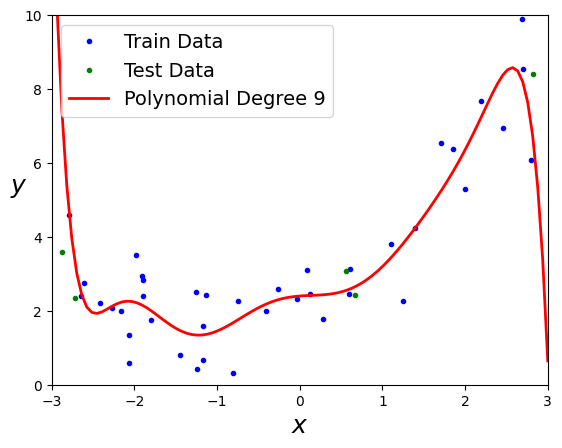

Train MAE: 0.66
Validation MAE: 1.45
Intercept: 2.400
Coefficients: 0.173, -0.553, 1.156, 0.575, -0.559, -0.103, 0.110, 0.006, -0.007


In [19]:
models = []
for degree in range(1,10):
    print(f'Degree {degree}')
    models.append(polynomial_fit(X=X_train, y=y_train, degree=degree, X_test=X_val, y_test=y_val))

In [21]:
models[3].predict(poly_features.transform(X_test))

array([[1.78789237],
       [1.77176414],
       [3.04785477],
       [3.66878691],
       [2.29348929]])

In [24]:
print('Test MAE:', round(mean_absolute_error(y_test, models[3].predict(poly_features.transform(X_test))),2))

Test MAE: 0.79
